In [1]:
!pip install qiskit
!pip install qiskit_aer

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, plot_coupling_map
from qiskit.quantum_info import Statevector
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
from numpy import sqrt, array

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.9 MB/s eta 0:00:00


## Task 1

In [2]:
from qiskit.circuit.library import MCXGate
mcx = MCXGate(3)

circuit = QuantumCircuit(4)
circuit.append(mcx, [0, 1, 2, 3])
circuit.draw()

q_0: ──■──
       │  
q_1: ──■──
       │  
q_2: ──■──
     ┌─┴─┐
q_3: ┤ X ├
     └───┘

a) The element that is found by this f is |111⟩, which corresponds to 7

b) $\frac{\pi}{4}\sqrt{8}$ which yields 2 iterations of Grovers algorithm

## Task 2

In [3]:
circuit = QuantumCircuit(9, 4)

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.x(8)
circuit.h(8)

def oracle(circuit):

    circuit.cx(0, 4)
    circuit.cx(1, 4)
    circuit.cx(1, 5)
    circuit.cx(2, 5)
    circuit.cx(2, 6)
    circuit.cx(3, 6)
    circuit.cx(3, 7)
    circuit.cx(0, 7)

    circuit.barrier()

    mcx = MCXGate(4)
    circuit.append(mcx, [4, 5, 6, 7, 8])

    circuit.barrier()

    circuit.cx(0, 7)
    circuit.cx(3, 7)
    circuit.cx(3, 6)
    circuit.cx(2, 6)
    circuit.cx(2, 5)
    circuit.cx(1, 5)
    circuit.cx(1, 4)
    circuit.cx(0, 4)


def diffusion(circuit):

    circuit.barrier()

    circuit.h(range(4))
    circuit.x(range(4))

    circuit.barrier()

    circuit.h(3)

    mcx = MCXGate(3)
    circuit.append(mcx, [0, 1, 2, 3])

    circuit.h(3)

    circuit.barrier()

    circuit.x(range(4))
    circuit.h(range(4))

    circuit.barrier()

for _ in range(2):
    oracle(circuit)
    diffusion(circuit)

circuit.measure(range(4), range(4))
circuit.draw()

┌───┐                                         ░       ░                »
q_0: ┤ H ├──■──────────────────────────────────■───░───────░───■────────────»
     ├───┤  │                                  │   ░       ░   │            »
q_1: ┤ H ├──┼────■────■────────────────────────┼───░───────░───┼────────────»
     ├───┤  │    │    │                        │   ░       ░   │            »
q_2: ┤ H ├──┼────┼────┼────■────■──────────────┼───░───────░───┼────────────»
     ├───┤  │    │    │    │    │              │   ░       ░   │            »
q_3: ┤ H ├──┼────┼────┼────┼────┼────■────■────┼───░───────░───┼────■────■──»
     └───┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░       ░   │    │    │  »
q_4: ─────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░───■───░───┼────┼────┼──»
          └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░   │   ░   │    │    │  »
q_5: ───────────────┤ X ├┤ X ├──┼────┼────┼────┼───░───■───░───┼────┼────┼──»
                    └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░   │   ░   │    │  ┌─┴─┐»
q_6: ─────────────────────────┤ X ├┤ X ├──┼────┼───░───■───░───┼────┼──┤ X ├»
                              └───┘└───┘┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┴─┐┌─┴─┐└───┘»
q_7: ───────────────────────────────────┤ X ├┤ X ├─░───■───░─┤ X ├┤ X ├─────»
     ┌───┐┌───┐                         └───┘└───┘ ░ ┌─┴─┐ ░ └───┘└───┘     »
q_8: ┤ X ├┤ H ├────────────────────────────────────░─┤ X ├─░────────────────»
     └───┘└───┘                                    ░ └───┘ ░                »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«                               ░ ┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ »
«q_0: ──────────────────────■───░─┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├─░─»
«                           │   ░ ├───┤├───┤ ░        │        ░ ├───┤├───┤ ░ »
«q_1: ────────────■────■────┼───░─┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├─░─»
«                 │    │    │   ░ ├───┤├───┤ ░        │        ░ ├───┤├───┤ ░ »
«q_2: ──■────■────┼────┼────┼───░─┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├─░─»
«       │    │    │    │    │   ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤ ░ »
«q_3: ──┼────┼────┼────┼────┼───░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├─░─»
«       │    │    │  ┌─┴─┐┌─┴─┐ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘ ░ »
«q_4: ──┼────┼────┼──┤ X ├┤ X ├─░────────────░─────────────────░────────────░─»
«       │  ┌─┴─┐┌─┴─┐└───┘└───┘ ░            ░                 ░            ░ »
«q_5: ──┼──┤ X ├┤ X ├───────────░────────────░─────────────────░────────────░─»
«     ┌─┴─┐└───┘└───┘           ░            ░                 ░            ░ »
«q_6: ┤ X ├─────────────────────░────────────░─────────────────░────────────░─»
«     └───┘                     ░            ░                 ░            ░ »
«q_7: ──────────────────────────░────────────░─────────────────░────────────░─»
«                               ░            ░                 ░            ░ »
«q_8: ──────────────────────────░────────────░─────────────────░────────────░─»
«                               ░            ░                 ░            ░ »
«c: 4/════════════════════════════════════════════════════════════════════════»
«                                                                             »
«                                              ░       ░                     »
«q_0: ──■──────────────────────────────────■───░───────░───■─────────────────»
«       │                                  │   ░       ░   │                 »
«q_1: ──┼────■────■────────────────────────┼───░───────░───┼─────────────────»
«       │    │    │                        │   ░       ░   │                 »
«q_2: ──┼────┼────┼────■────■──────────────┼───░───────░───┼──────────────■──»
«       │    │    │    │    │              │   ░       ░   │              │  »
«q_3: ──┼────┼────┼────┼────┼────■────■────┼───░───────░───┼────■────■────┼──»
«     ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░       

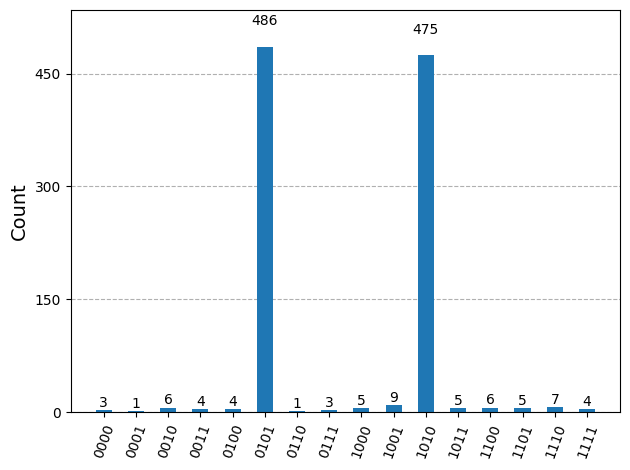

In [4]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts(circuit))

In [5]:
circuit = QuantumCircuit(27, 6)

circuit.x(6)
circuit.x(7)
circuit.x(9)
circuit.x(10)
# circuit.h(range(14))
circuit.h([2, 3, 4, 5, 12, 13])
circuit.x(26)
circuit.h(26)


# its probably overly complicated, but the idea is:
# we encode colour of a node with two qubits (a1, a1') or (a2, a2')
# if its connected to another qubit the colours must be different so this checks if the two qubit pairs are different
# and stores it as 1 in qubit (final) if the requirement is satisfied
def edge(a1, a2, final):
    circuit.cx(2 * a1, 2 * a2)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.x(2 * a2)
    circuit.x(2 * a2 + 1)
    circuit.ccx(2 * a2, 2 * a2 + 1, final)
    circuit.x(final)
    circuit.x(2 * a2)
    circuit.x(2 * a2 + 1)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.cx(2 * a1, 2 * a2)

def invert_edge(a1, a2, final):
    circuit.cx(2 * a1, 2 * a2)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.x(2 * a2 + 1)
    circuit.x(2 * a2)
    circuit.x(final)
    circuit.ccx(2 * a2, 2 * a2 + 1, final)
    circuit.x(2 * a2 + 1)
    circuit.x(2 * a2)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.cx(2 * a1, 2 * a2)

list_edges = [(0,1), (1,2), (2,3), (0,4), (0,5), (1,4), (1,5), (4,5), (2,5), (5,6), (3,6), (2,6)]

def oracle(circuit):

    for i, edges in enumerate(list_edges):
      edge(edges[0], edges[1], 14 + i)

    circuit.barrier()

    mcx = MCXGate(12)
    circuit.append(mcx, [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

    circuit.barrier()

    for i, edges in enumerate(reversed(list_edges)):
      invert_edge(edges[0], edges[1], 14 + i)



def diffusion(circuit):

    circuit.barrier()

    circuit.h([2, 3, 4, 5, 12, 13])
    circuit.x([2, 3, 4, 5, 12, 13])

    circuit.barrier()

    circuit.h(13)

    mcx = MCXGate(5)
    circuit.append(mcx, [2, 3, 4, 5, 12, 13])

    circuit.h(13)

    circuit.barrier()

    circuit.x([2, 3, 4, 5, 12, 13])
    circuit.h([2, 3, 4, 5, 12, 13])

    circuit.barrier()

for _ in range(4):
    oracle(circuit)
    diffusion(circuit)

circuit.measure([2, 3, 4, 5, 12, 13], [0, 1, 2, 3, 4, 5])

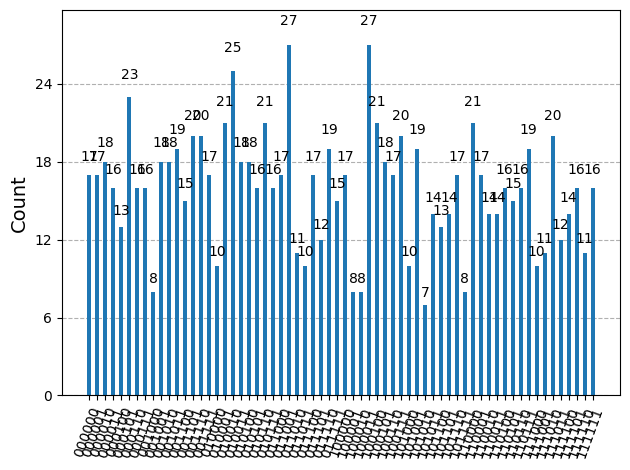

In [6]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts(circuit))

In [7]:
circuit = QuantumCircuit(27, 6)

circuit.x(6)
circuit.x(7)
circuit.x(9)
circuit.x(10)
# circuit.h(range(14))
circuit.h([2, 3, 4, 5, 12, 13])
circuit.x(26)
circuit.h(26)


# its probably overly complicated, but the idea is:
# we encode colour of a node with two qubits (a1, a1') or (a2, a2')
# if its connected to another qubit the colours must be different so this checks if the two qubit pairs are different
# and stores it as 1 in qubit (final) if the requirement is satisfied
def edge(a1, a2, final):
    circuit.cx(2 * a1, 2 * a2)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.x(2 * a2)
    circuit.x(2 * a2 + 1)
    circuit.ccx(2 * a2, 2 * a2 + 1, final)
    circuit.x(final)
    circuit.x(2 * a2)
    circuit.x(2 * a2 + 1)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.cx(2 * a1, 2 * a2)

def invert_edge(a1, a2, final):
    circuit.cx(2 * a1, 2 * a2)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.x(2 * a2 + 1)
    circuit.x(2 * a2)
    circuit.x(final)
    circuit.ccx(2 * a2, 2 * a2 + 1, final)
    circuit.x(2 * a2 + 1)
    circuit.x(2 * a2)
    circuit.cx(2 * a1 + 1, 2 * a2 + 1)
    circuit.cx(2 * a1, 2 * a2)


list_edges = [(0,1), (1, 2), (2,3), (0,4), (0,5), (1,4), (1,5), (4,5), (2, 5), (5,6), (3, 6), (2,6)]

def oracle(circuit):

    for i, edges in enumerate(list_edges):
        edge(edges[0], edges[1], 14 + i)

    circuit.barrier()

    mcx = MCXGate(12)
    circuit.append(mcx, [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

    circuit.barrier()

    for i, edges in enumerate(reversed(list_edges)):
        invert_edge(edges[0], edges[1], 14 + i)



def diffusion(circuit):

    circuit.barrier()

    circuit.h(range(14))
    circuit.x(range(14))

    circuit.barrier()

    circuit.h(13)

    mcx = MCXGate(13)
    circuit.append(mcx, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

    circuit.h(13)

    circuit.barrier()

    circuit.x(range(14))
    circuit.h(range(14))

    circuit.barrier()

for _ in range(4):
    oracle(circuit)
    diffusion(circuit)

circuit.measure([2, 3, 4, 5, 12, 13], [0, 1, 2, 3, 4, 5])

In [ ]:
simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
sim_result = simulator.run(compiled_circuit).result()
plot_histogram(sim_result.get_counts(circuit))